# Mushroom Classification Dataset Analysis

## Project Overview
This notebook analyzes the **Mushroom Classification Dataset** from Kaggle (UCI) to verify if it meets the following requirements:
- **Minimum Features**: 12
- **Minimum Instances**: 500
- **Classification Type**: Binary or Multi-class

## Dataset Information
- **Source**: Kaggle (UCI Machine Learning Repository)
- **Dataset**: `uciml/mushroom-classification`
- **Objective**: Determine if the dataset is suitable for multiple classification models

## 1. Import Required Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ All libraries imported successfully!


## 2. Download Dataset from Kaggle

In [2]:
# Download latest version of the Mushroom Classification dataset
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("="*70)
print("MUSHROOM CLASSIFICATION DATASET - KAGGLE")
print("="*70)
print(f"\n✓ Path to dataset files: {path}")

# List files in the directory
print("\nFiles in dataset directory:")
for file in os.listdir(path):
    print(f"  - {file}")

MUSHROOM CLASSIFICATION DATASET - KAGGLE

✓ Path to dataset files: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1

Files in dataset directory:
  - mushrooms.csv


## 3. Load and Explore the Dataset

In [3]:
# Find and load the CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    print(f"Loading dataset from: {csv_file}")
    df = pd.read_csv(csv_file)
    print(f"\n✓ Dataset loaded successfully!")
else:
    print("✗ No CSV file found!")

Loading dataset from: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1/mushrooms.csv

✓ Dataset loaded successfully!


In [4]:
# Display first few rows
print("="*70)
print("DATASET PREVIEW")
print("="*70)
df.head(10)

DATASET PREVIEW


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


## 4. Dataset Shape and Requirements Verification

In [5]:
print("="*70)
print("REQUIREMENT VERIFICATION")
print("="*70)

# Dataset shape
print(f"\n1. DATASET SHAPE:")
print(f"   Rows (Instances): {df.shape[0]}")
print(f"   Columns (Features): {df.shape[1]}")

REQUIREMENT VERIFICATION

1. DATASET SHAPE:
   Rows (Instances): 8124
   Columns (Features): 23


## 5. Feature Information and Data Types

In [6]:
print("="*70)
print("FEATURE INFORMATION")
print("="*70)

print(f"\nTotal Features: {len(df.columns)}")
print("\nFeature Details:")
print("-" * 70)

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    unique_vals = df[col].nunique()
    sample_vals = df[col].unique()[:5]
    print(f"{i:2d}. {col:20s} | Type: {str(dtype):10s} | Unique: {unique_vals:4d} | Sample: {sample_vals}")

FEATURE INFORMATION

Total Features: 23

Feature Details:
----------------------------------------------------------------------
 1. class                | Type: object     | Unique:    2 | Sample: ['p' 'e']
 2. cap-shape            | Type: object     | Unique:    6 | Sample: ['x' 'b' 's' 'f' 'k']
 3. cap-surface          | Type: object     | Unique:    4 | Sample: ['s' 'y' 'f' 'g']
 4. cap-color            | Type: object     | Unique:   10 | Sample: ['n' 'y' 'w' 'g' 'e']
 5. bruises              | Type: object     | Unique:    2 | Sample: ['t' 'f']
 6. odor                 | Type: object     | Unique:    9 | Sample: ['p' 'a' 'l' 'n' 'f']
 7. gill-attachment      | Type: object     | Unique:    2 | Sample: ['f' 'a']
 8. gill-spacing         | Type: object     | Unique:    2 | Sample: ['c' 'w']
 9. gill-size            | Type: object     | Unique:    2 | Sample: ['n' 'b']
10. gill-color           | Type: object     | Unique:   12 | Sample: ['k' 'n' 'g' 'p' 'w']
11. stalk-shape          

## 6. Classification Type Analysis

In [7]:
print("="*70)
print("CLASSIFICATION TYPE ANALYSIS")
print("="*70)

# Assuming first column is the target variable
target_col = df.columns[0]
unique_classes = df[target_col].nunique()

print(f"\nTarget Variable: '{target_col}'")
print(f"Unique Classes: {unique_classes}")
print(f"Classification Type: {'Binary Classification' if unique_classes == 2 else 'Multi-class Classification'}")
print(f"\nClasses: {sorted(df[target_col].unique())}")

# Class distribution
print(f"\nClass Distribution:")
print("-" * 50)
class_counts = df[target_col].value_counts()
for cls, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {cls}: {count:6d} ({percentage:5.2f}%)")

CLASSIFICATION TYPE ANALYSIS

Target Variable: 'class'
Unique Classes: 2
Classification Type: Binary Classification

Classes: ['e', 'p']

Class Distribution:
--------------------------------------------------
  e:   4208 (51.80%)
  p:   3916 (48.20%)


## 7. Data Quality Check

In [8]:
print("="*70)
print("DATA QUALITY CHECK")
print("="*70)

# Missing values
print("\n1. MISSING VALUES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✓ No missing values found!")
else:
    print("   Missing values detected:")
    for col, count in missing[missing > 0].items():
        print(f"   - {col}: {count}")

# Duplicate rows
print("\n2. DUPLICATE ROWS:")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("   ✓ No duplicate rows found!")
else:
    print(f"   ✗ {duplicates} duplicate rows found")

DATA QUALITY CHECK

1. MISSING VALUES:
   ✓ No missing values found!

2. DUPLICATE ROWS:
   ✓ No duplicate rows found!


## 8. Visualizations

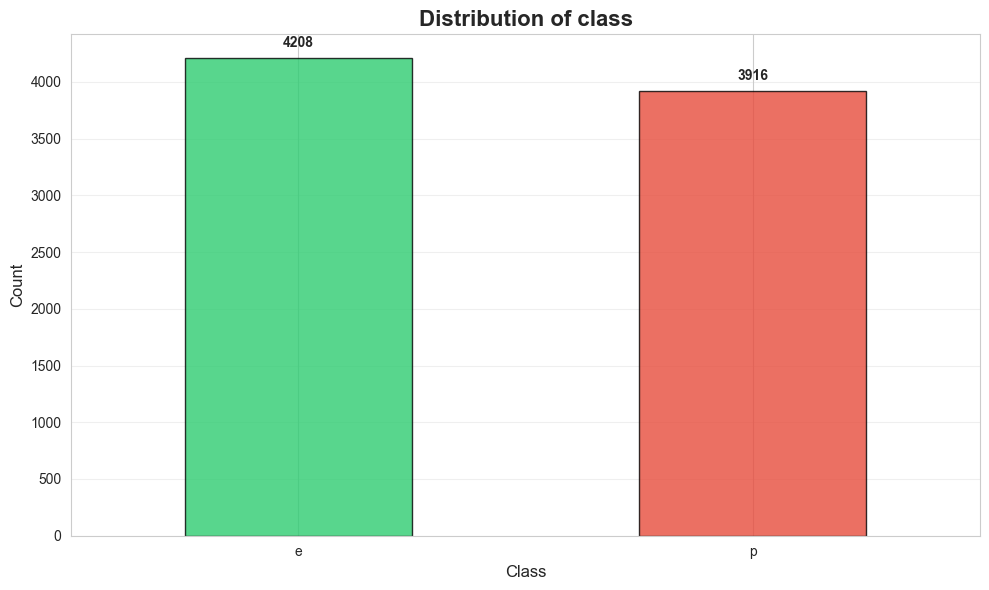


✓ Class distribution visualization created!


In [9]:
# Class Distribution Bar Chart
plt.figure(figsize=(10, 6))
class_counts = df[target_col].value_counts()
colors = ['#2ecc71', '#e74c3c'] if len(class_counts) == 2 else plt.cm.Set3(range(len(class_counts)))
class_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)
plt.title(f'Distribution of {target_col}', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(class_counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Class distribution visualization created!")

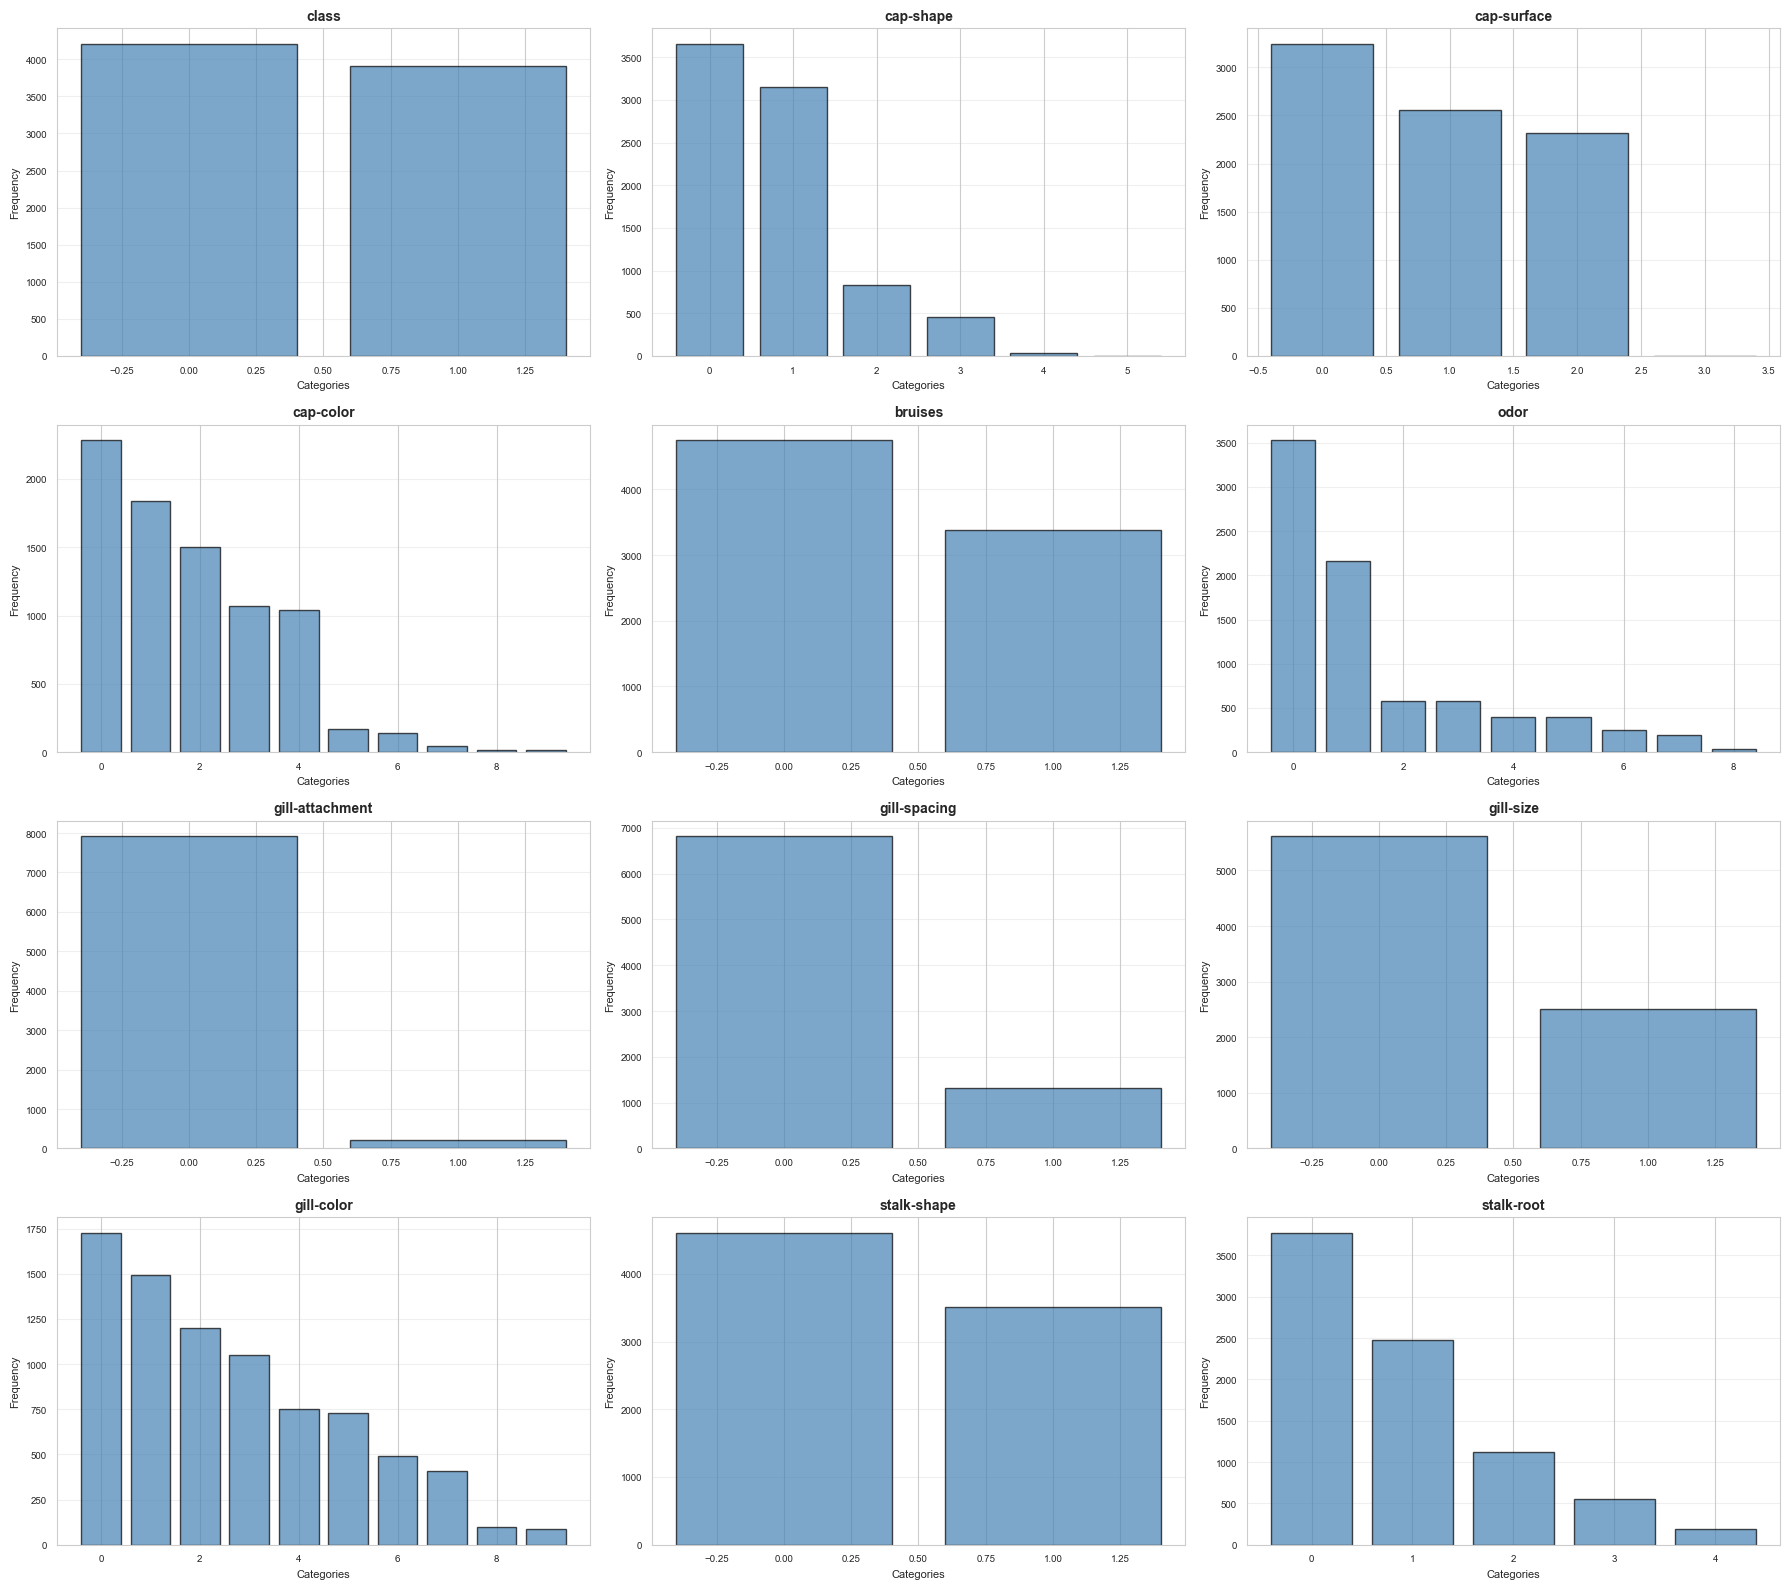


✓ Feature distribution visualizations created!


In [10]:
# Feature Value Distribution (for categorical features)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:12]):
    if idx < len(axes):
        value_counts = df[col].value_counts().head(10)
        axes[idx].bar(range(len(value_counts)), value_counts.values, 
                     color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Categories', fontsize=8)
        axes[idx].set_ylabel('Frequency', fontsize=8)
        axes[idx].tick_params(labelsize=7)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Feature distribution visualizations created!")

## 9. Statistical Summary

In [11]:
print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)

# For categorical data, show value counts
print("\nValue counts for each feature:")
print("-" * 70)

for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

STATISTICAL SUMMARY

Value counts for each feature:
----------------------------------------------------------------------

class:
class
e    4208
p    3916
Name: count, dtype: int64

cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
Name: count, dtype: int64

cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
Name: count, dtype: int64

bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

odor:
odor
n    3528
f    2160
s     576
y     576
a     400
Name: count, dtype: int64

gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
Name: count, dtype: int64

stalk-shape:
stalk-shape
t    4608
e    3516
Name: cou

## 10. Final Summary and Recommendations

In [12]:
print("="*70)
print("FINAL SUMMARY - MUSHROOM CLASSIFICATION DATASET")
print("="*70)

print(f"\n📊 DATASET SPECIFICATIONS:")
print(f"   • Source: Kaggle (UCI Machine Learning Repository)")
print(f"   • Dataset: uciml/mushroom-classification")
print(f"   • Instances: {df.shape[0]}")
print(f"   • Features: {df.shape[1]}")
print(f"   • Target Variable: {target_col}")
print(f"   • Classification Type: {'Binary' if unique_classes == 2 else 'Multi-class'} ({unique_classes} classes)")

FINAL SUMMARY - MUSHROOM CLASSIFICATION DATASET

📊 DATASET SPECIFICATIONS:
   • Source: Kaggle (UCI Machine Learning Repository)
   • Dataset: uciml/mushroom-classification
   • Instances: 8124
   • Features: 23
   • Target Variable: class
   • Classification Type: Binary (2 classes)


## 11. Data Preprocessing and Feature Encoding

Before building the model, we need to encode categorical features since machine learning models work with numerical data.

In [13]:
from sklearn.preprocessing import LabelEncoder

print("="*70)
print("DATA PREPROCESSING")
print("="*70)

# Create a copy of the dataframe
df_encoded = df.copy()

# Initialize label encoders
label_encoders = {}

# Encode all categorical features
print("\nEncoding categorical features...")
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    print(f"✓ Encoded: {column}")

print("\n✓ All features encoded successfully!")
print(f"\nEncoded dataset shape: {df_encoded.shape}")
df_encoded.head()

DATA PREPROCESSING

Encoding categorical features...
✓ Encoded: class
✓ Encoded: cap-shape
✓ Encoded: cap-surface
✓ Encoded: cap-color
✓ Encoded: bruises
✓ Encoded: odor
✓ Encoded: gill-attachment
✓ Encoded: gill-spacing
✓ Encoded: gill-size
✓ Encoded: gill-color
✓ Encoded: stalk-shape
✓ Encoded: stalk-root
✓ Encoded: stalk-surface-above-ring
✓ Encoded: stalk-surface-below-ring
✓ Encoded: stalk-color-above-ring
✓ Encoded: stalk-color-below-ring
✓ Encoded: veil-type
✓ Encoded: veil-color
✓ Encoded: ring-number
✓ Encoded: ring-type
✓ Encoded: spore-print-color
✓ Encoded: population
✓ Encoded: habitat

✓ All features encoded successfully!

Encoded dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## 12. Train-Test Split

Split the dataset into training and testing sets (80-20 split).

In [14]:
# Separate features and target
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in testing set:")
print(y_test.value_counts())

TRAIN-TEST SPLIT

Training set size: 6499 samples
Testing set size: 1625 samples

Features: 22

Class distribution in training set:
class
0    3366
1    3133
Name: count, dtype: int64

Class distribution in testing set:
class
0    842
1    783
Name: count, dtype: int64


## 13. Logistic Regression Model

Train and evaluate a Logistic Regression classifier.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
    roc_curve
)
import warnings
warnings.filterwarnings('ignore')

print("✓ Evaluation metrics imported successfully!")

✓ Evaluation metrics imported successfully!


In [16]:
# Initialize and train Logistic Regression model
print("="*70)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*70)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print("\n✓ Model trained successfully!")
print(f"\nModel: {lr_model}")
print(f"Number of iterations: {lr_model.n_iter_[0]}")

TRAINING LOGISTIC REGRESSION MODEL

✓ Model trained successfully!

Model: LogisticRegression(max_iter=1000, random_state=42)
Number of iterations: 283


In [17]:
# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

print("✓ Predictions completed!")
print(f"\nPredictions shape: {y_pred.shape}")
print(f"Probability predictions shape: {y_pred_proba.shape}")

✓ Predictions completed!

Predictions shape: (1625,)
Probability predictions shape: (1625,)


## 14. Model Evaluation Metrics

Calculate all required evaluation metrics for the Logistic Regression model.

In [18]:
# Calculate all evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("="*70)
print("LOGISTIC REGRESSION - EVALUATION METRICS")
print("="*70)

print("\n📊 Performance Metrics:")
print("-" * 70)
print(f"1. Accuracy:                        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"2. AUC Score:                       {auc_score:.4f}")
print(f"3. Precision:                       {precision:.4f}")
print(f"4. Recall:                          {recall:.4f}")
print(f"5. F1 Score:                        {f1:.4f}")
print(f"6. Matthews Correlation Coef (MCC): {mcc:.4f}")
print("-" * 70)

# Store metrics in a dictionary for later use
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'AUC Score': auc_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MCC Score': mcc
}

print("\n✓ All metrics calculated successfully!")

LOGISTIC REGRESSION - EVALUATION METRICS

📊 Performance Metrics:
----------------------------------------------------------------------
1. Accuracy:                        0.9557 (95.57%)
2. AUC Score:                       0.9821
3. Precision:                       0.9599
4. Recall:                          0.9476
5. F1 Score:                        0.9537
6. Matthews Correlation Coef (MCC): 0.9113
----------------------------------------------------------------------

✓ All metrics calculated successfully!


## 15. Confusion Matrix and Classification Report

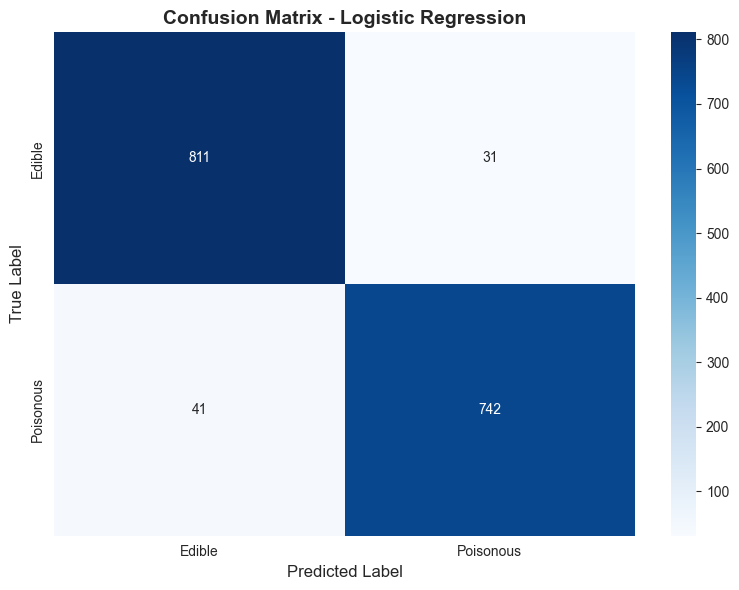


Confusion Matrix:
[[811  31]
 [ 41 742]]

True Negatives:  811
False Positives: 31
False Negatives: 41
True Positives:  742


In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

In [20]:
# Classification Report
print("="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Edible       0.95      0.96      0.96       842
   Poisonous       0.96      0.95      0.95       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## 16. ROC Curve

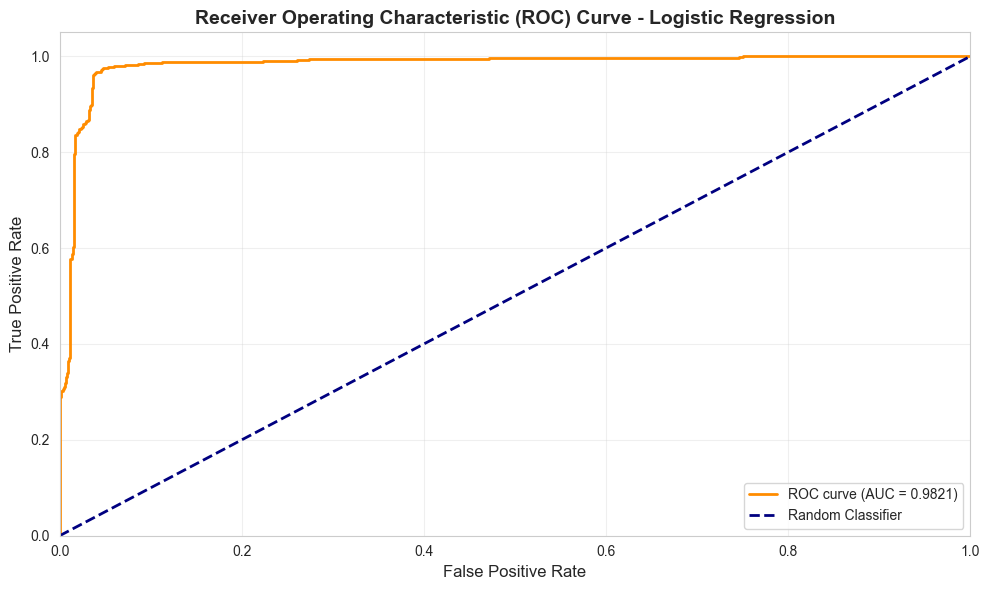

✓ ROC-AUC Score: 0.9821


In [21]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ ROC-AUC Score: {auc_score:.4f}")

## 17. Model Summary

Summary of the Logistic Regression model performance.

In [22]:
print("="*70)
print("LOGISTIC REGRESSION MODEL - FINAL SUMMARY")
print("="*70)

print("\n📊 Dataset Information:")
print(f"   • Total Samples: {len(df)}")
print(f"   • Training Samples: {len(X_train)}")
print(f"   • Testing Samples: {len(X_test)}")
print(f"   • Number of Features: {X_train.shape[1]}")

print("\n📈 Model Performance:")
print("-" * 70)
for metric, value in lr_metrics.items():
    if metric == 'Model':
        continue
    if isinstance(value, float):
        print(f"   • {metric:30s}: {value:.4f} ({value*100:.2f}%)")
print("-" * 70)

print("\n💡 Model Interpretation:")
if accuracy >= 0.95:
    print("   ✓ EXCELLENT: Model shows outstanding performance!")
elif accuracy >= 0.90:
    print("   ✓ VERY GOOD: Model performs very well!")
elif accuracy >= 0.80:
    print("   ✓ GOOD: Model shows good performance!")
else:
    print("   ⚠ MODERATE: Model may need improvement!")

print("\n✓ Logistic Regression model training and evaluation completed!")
print("="*70)

LOGISTIC REGRESSION MODEL - FINAL SUMMARY

📊 Dataset Information:
   • Total Samples: 8124
   • Training Samples: 6499
   • Testing Samples: 1625
   • Number of Features: 22

📈 Model Performance:
----------------------------------------------------------------------
   • Accuracy                      : 0.9557 (95.57%)
   • AUC Score                     : 0.9821 (98.21%)
   • Precision                     : 0.9599 (95.99%)
   • Recall                        : 0.9476 (94.76%)
   • F1 Score                      : 0.9537 (95.37%)
   • MCC Score                     : 0.9113 (91.13%)
----------------------------------------------------------------------

💡 Model Interpretation:
   ✓ EXCELLENT: Model shows outstanding performance!

✓ Logistic Regression model training and evaluation completed!
